In [1]:
import numpy as np
import pandas as pd
from statsmodels.tools import categorical
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
clf=RandomForestClassifier(n_estimators=100, max_depth = 50)
model = tree.DecisionTreeClassifier(max_depth = 50)

### Problem 1

In [3]:
mushroom_raw = np.loadtxt("data/agaricus-lepiota.data", dtype = 'O')
mushroom_features = np.zeros((mushroom_raw.shape[0], 22), dtype = 'O')
mushroom_label = np.zeros(mushroom_raw.shape)
for i in range(mushroom_raw.shape[0]):
    s = str(mushroom_raw[i])
    if s[0] == 'p':
        mushroom_label[i] = 1
    s = s[2:]
    for j in range(22):
        temp = s.split(',')
        mushroom_features[i,j] = temp[j]

In [4]:
for i in range(22):
    temp = categorical(mushroom_features[:,i], drop=True)
    temp = np.argwhere(temp == 1)
    mushroom_features[:,i] = temp[:,1]
mushroom_features = mushroom_features.astype('float64')

F:\tools\Anaconda\lib\site-packages\statsmodels\tools\tools.py:162: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  FutureWarning


In [5]:
X_train, X_test, y_train, y_test = train_test_split(mushroom_features, mushroom_label, test_size=0.2)

In [6]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 1.0


array([[831,   0],
       [  0, 794]], dtype=int64)

In [7]:
imp_features = np.argsort(clf.feature_importances_)
imp_features[:10]

array([15, 16,  5,  0, 17,  1, 13,  2, 14,  9], dtype=int64)

In [8]:
clf.fit(X_train[:,imp_features[:10]],y_train)
y_pred=clf.predict(X_test[:,imp_features[:10]])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.9076923076923077


array([[772,  59],
       [ 91, 703]], dtype=int64)

In [9]:
cm = metrics.confusion_matrix(y_test, y_pred)
prob_falsepositive = cm[1,0] / cm[:,0].sum()
prob_poison = mushroom_label.sum() / mushroom_label.size
prob_falsepositive * prob_poison

0.05082804023156714

### Problem 2

In [10]:
with open('data\EEG Eye State.arff') as f:
     read_data = f.read()
read_data = read_data.split('\n')
eye_attributes = read_data[:19]

In [11]:
eye_raw = np.zeros((len(read_data)-19, 15))
for i in range(19, len(read_data)-1):
    eye_raw[i-19] = np.fromstring(read_data[i], dtype=float, sep=',')
eye_features = eye_raw[:,:14]
eye_label = eye_raw[:,14]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(eye_features, eye_label, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.8335001668335001


array([[1421,  231],
       [ 268, 1077]], dtype=int64)

In [13]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.9312645979312646


array([[1588,   64],
       [ 142, 1203]], dtype=int64)

In [14]:
model.get_depth()

27

### Problem 4

In [15]:
param_grid = { 
    'C': [1, 0.025],
    'kernel': ['linear', 'poly'],
}
CV_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv= 5)
CV_svm.fit(X_train, y_train)

y_pred = CV_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.6436436436436437


array([[1297,  355],
       [ 713,  632]], dtype=int64)

In [16]:
param_grid = { 
    'var_smoothing': [1e-9, 1e-5],
}
CV_nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv= 5)
CV_nb.fit(X_train, y_train)

y_pred = CV_nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.4481147814481148


array([[  31, 1621],
       [  33, 1312]], dtype=int64)

In [17]:
param_grid = { 
    'n_estimators': [10, 100],
}
CV_nb = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_nb.fit(X_train, y_train)

y_pred = CV_nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.9282615949282615


array([[1582,   70],
       [ 145, 1200]], dtype=int64)

### Problem 3

In [18]:
patient_raw = np.loadtxt("data\haberman.data",delimiter=',')
patient_features = patient_raw[:,:3]
patient_label = patient_raw[:,3]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(patient_features, patient_label, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.6451612903225806


array([[38, 11],
       [11,  2]], dtype=int64)

In [20]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.6935483870967742


array([[42,  7],
       [12,  1]], dtype=int64)

In [29]:
N = 50
accuracy_decision_tree = np.zeros(N)
accuracy_random_forest = np.zeros(N)
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(patient_features, patient_label, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    temp1 = metrics.accuracy_score(y_test, y_pred)
    accuracy_decision_tree[i] = temp1
    
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    temp2 = metrics.accuracy_score(y_test, y_pred)
    accuracy_random_forest[i] = temp2
    
    #print(temp1, temp2)

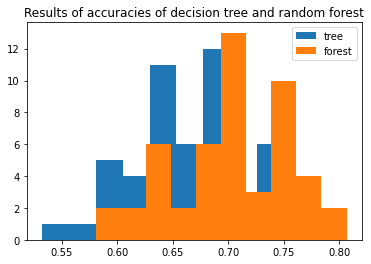

tree mean:  0.6593548387096775 forest mean:  0.7019354838709678


In [30]:
import matplotlib.pyplot as plt

plt.hist(accuracy_decision_tree, label='tree')
plt.hist(accuracy_random_forest, label='forest')
plt.legend()
plt.title("Results of accuracies of decision tree and random forest")
plt.show()
print("tree mean: ", accuracy_decision_tree.mean(), "forest mean: ", accuracy_random_forest.mean())